<a href="https://colab.research.google.com/github/KILjungjoon/Project_Asian_Parliament/blob/main/HK_TopicModeling2019_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# coding: utf-8
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.tag import pos_tag
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


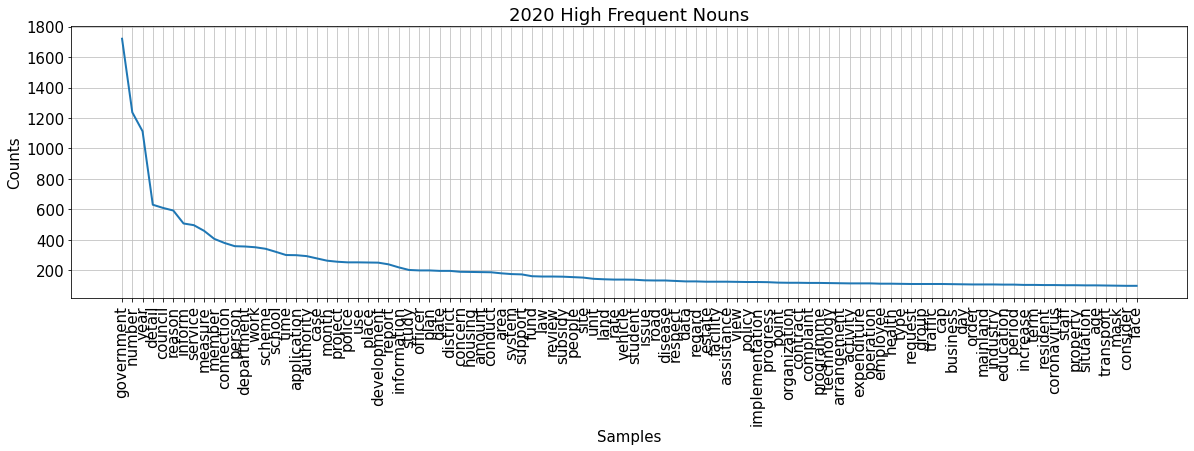

In [39]:
import pandas as pd
clean2020=open('/content/drive/MyDrive/★Project_prof.Jang/Hong Kong/data/clean2020.txt').read()
tokens=clean2020.split()
import re
re01=re.sub("[^a-zA-Z]", " ", clean2019)    # 영어 외 모두 제거

hansard_terms=['pm', 'ms', 'mr', 'minister', 'ministry', 'dr', 'prof.', 'speaker',
                'deputy', 'assoc.', 'sir', 'mp', 'mps', 'viii', 'vii', 'vi', 'v',
                'iv', 'iii', 'ii', 'i', 'hong', 'kong', 'e', 'g', 'ha']
clean = []
for word in tokens: 
  if word not in hansard_terms: 
      clean.append(word) 

tokens_tag=pos_tag(clean)
nouns2020=[word for word, pos in tokens_tag if pos in ['NN', 'NNS']]

'''아래 4행은 저장할 때만 쓰는 코드'''
nouns2020str=' '.join(nouns2020)
f=open('/content/drive/MyDrive/★Project_prof.Jang/Hong Kong/data/nouns2020.txt', 'w')
f.write(nouns2020str)
f.close()

plt.figure(figsize=(20, 5))              # changing the graph size
plt.rcParams.update({'font.size': 15})   # changing a font size
plt.title('2020 High Frequent Nouns')
Freq_dist_nltk = nltk.FreqDist(nouns2020)
Freq_dist_nltk.plot(100, cumulative=False)

In [40]:
print(nouns2019)
print(nouns2020)

['secretary', 'committee', 'party', 'china', 'point', 'report', 'cpc', 'congress', 'order', 'step', 'advance', 'democracy', 'sar', 'article', 'law', 'stipulate', 'aim', 'executive', 'ce', 'member', 'council', 'legco', 'suffrage', 'suffrage', 'situation', 'sar', 'accordance', 'principle', 'progress', 'december', 'month', 'election', 'government', 'consultation', 'method', 'select', 'ce', 'form', 'legco', 'election', 'month', 'government', 'inform', 'council', 'consider', 'launch', 'consultation', 'method', 'select', 'ce', 'form', 'legco', 'well', 'commence', 'step', 'process', 'assess', 'time', 'work', 'spirit', 'remark', 'aim', 'suffrage', 'sar', 'stipulate', 'law', 'ce', 'duty', 'visit', 'month', 'leader', 'authority', 'issue', 'reform', 'sar', 'detail', 'reason', 'cruise', 'build', 'cost', 'government', 'operation', 'year', 'commissioning', 'report', 'cruise', 'ship', 'call', 'day', 'year', 'couple', 'fact', 'transport', 'lack', 'facility', 'visit', 'tourist', 'member', 'terminal', '

In [70]:
texts = [nouns2020]
print(texts)

[['month', 'police', 'quantity', 'weapon', 'range', 'bullet', 'people', 'event', 'cause', 'casualty', 'frame', 'police', 'police', 'quantity', 'petrol', 'bomb', 'bomb', 'chemical', 'report', 'month', 'member', 'organization', 'demonstration', 'incident', 'cause', 'number', 'member', 'worry', 'law', 'order', 'situation', 'deteriorate', 'connection', 'government', 'inform', 'council', 'lethality', 'type', 'firearm', 'quantity', 'type', 'weapon', 'chemical', 'weapon', 'police', 'june', 'year', 'police', 'investigate', 'origin', 'firearm', 'weapon', 'connection', 'organization', 'action', 'authority', 'assessment', 'law', 'order', 'situation', 'strategy', 'violence', 'curb', 'disorder', 'prevent', 'activity', 'occurrence', 'disturbance', 'arise', 'amendment', 'number', 'person', 'police', 'officer', 'person', 'view', 'search', 'information', 'family', 'member', 'internet', 'information', 'others', 'family', 'member', 'person', 'view', 'silence', 'avoid', 'office', 'privacy', 'data', 'pcpd'

In [79]:
dictionary = corpora.Dictionary(texts)  # 딕셔너리 자료형으로 전환

corpus = [dictionary.doc2bow(text) for text in texts]   # generating doc-term matrix and save it to 'corpus'

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=8, id2word = dictionary,passes=15)   # creating lda model, topics=8

ldamodel.print_topics(num_words=10)     # the number of words to print by topic

[(0,
  '0.001*"government" + 0.001*"year" + 0.001*"number" + 0.001*"reason" + 0.001*"inform" + 0.001*"service" + 0.001*"connection" + 0.000*"detail" + 0.000*"council" + 0.000*"measure"'),
 (1,
  '0.001*"government" + 0.001*"year" + 0.001*"number" + 0.000*"detail" + 0.000*"council" + 0.000*"reason" + 0.000*"inform" + 0.000*"measure" + 0.000*"member" + 0.000*"service"'),
 (2,
  '0.001*"government" + 0.001*"number" + 0.001*"year" + 0.000*"council" + 0.000*"service" + 0.000*"reason" + 0.000*"member" + 0.000*"inform" + 0.000*"department" + 0.000*"scheme"'),
 (3,
  '0.003*"government" + 0.002*"year" + 0.002*"number" + 0.001*"reason" + 0.001*"council" + 0.001*"department" + 0.001*"detail" + 0.001*"inform" + 0.001*"service" + 0.001*"member"'),
 (4,
  '0.001*"government" + 0.001*"number" + 0.001*"year" + 0.001*"detail" + 0.000*"reason" + 0.000*"council" + 0.000*"inform" + 0.000*"application" + 0.000*"person" + 0.000*"service"'),
 (5,
  '0.001*"number" + 0.001*"government" + 0.001*"year" + 0.001

In [72]:
ldamodel.get_document_topics(corpus)[0]   # 0번째 문서의 토픽의 분포:문서가 1개이므로 [0]밖에 없다

[(5, 0.97178626), (7, 0.020299857)]

In [73]:
# perplexity와 coherence 구하기

from gensim.models import CoherenceModel

print('\nPerplexity: ', ldamodel.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary,topn=100)
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.334555521995878

Coherence Score:  0.09693754002868124


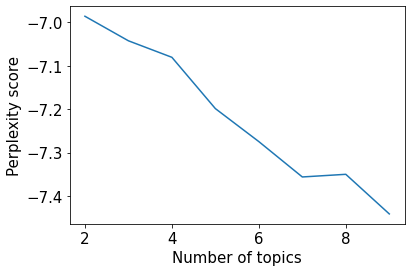

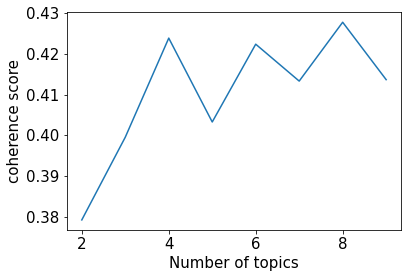

In [77]:
import matplotlib.pyplot as plt

perplexity_values = []
for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

x = range(2,10)
plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

coherence_values = []
for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary,topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("coherence score")
plt.show()

In [80]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=2fa88a40e196982f0f58a682ffefd8aea92abf36dbfc2b6a5a6ed6d8463ce04c
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=82d83b4f98c083cf45745ce8e4e075393c6d143fb71bf946e16e4573c0e4fa19
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


---
---
* 다른 접근

In [84]:
# 각 단어를 (word_id, word_frequency) 형태로 정수 인코딩
from gensim import corpora
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
print(corpus[0]) # 텍스트가 한 개의 덩어리이므로 [0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 7), (7, 1), (8, 1), (9, 1), (10, 1), (11, 9), (12, 1), (13, 1), (14, 7), (15, 2), (16, 2), (17, 5), (18, 3), (19, 1), (20, 2), (21, 57), (22, 2), (23, 2), (24, 37), (25, 1), (26, 3), (27, 11), (28, 2), (29, 35), (30, 15), (31, 37), (32, 3), (33, 1), (34, 4), (35, 1), (36, 1), (37, 2), (38, 1), (39, 2), (40, 9), (41, 1), (42, 11), (43, 1), (44, 65), (45, 97), (46, 2), (47, 1), (48, 115), (49, 1), (50, 3), (51, 1), (52, 3), (53, 31), (54, 30), (55, 1), (56, 1), (57, 1), (58, 1), (59, 3), (60, 15), (61, 4), (62, 2), (63, 13), (64, 3), (65, 4), (66, 11), (67, 4), (68, 20), (69, 5), (70, 6), (71, 9), (72, 1), (73, 4), (74, 5), (75, 7), (76, 27), (77, 5), (78, 2), (79, 1), (80, 2), (81, 24), (82, 9), (83, 6), (84, 54), (85, 3), (86, 1), (87, 1), (88, 2), (89, 1), (90, 102), (91, 36), (92, 1), (93, 34), (94, 3), (95, 2), (96, 3), (97, 1), (98, 43), (99, 2), (100, 16), (101, 11), (102, 36), (103, 8), (104, 8), (105, 1), (106, 5), (107, 1), (

In [86]:
len(dictionary)

3835

* 위에서 총 3835개의 단어가 인코딩됐다.

In [85]:
# 162번째 단어를 찾아보자
print(dictionary[161])

application


In [95]:
import gensim
NUM_TOPICS = 20 # 20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

(0, '0.001*"government" + 0.001*"number" + 0.000*"year" + 0.000*"reason" + 0.000*"inform" + 0.000*"service" + 0.000*"department" + 0.000*"council" + 0.000*"detail" + 0.000*"member"')
(1, '0.001*"government" + 0.001*"year" + 0.001*"number" + 0.001*"detail" + 0.001*"reason" + 0.000*"council" + 0.000*"inform" + 0.000*"scheme" + 0.000*"service" + 0.000*"department"')
(2, '0.001*"government" + 0.001*"year" + 0.001*"number" + 0.000*"council" + 0.000*"detail" + 0.000*"reason" + 0.000*"measure" + 0.000*"inform" + 0.000*"connection" + 0.000*"work"')
(3, '0.001*"government" + 0.001*"number" + 0.001*"year" + 0.001*"reason" + 0.001*"inform" + 0.001*"council" + 0.001*"detail" + 0.001*"member" + 0.001*"scheme" + 0.001*"service"')
(4, '0.001*"number" + 0.001*"year" + 0.001*"government" + 0.000*"reason" + 0.000*"service" + 0.000*"detail" + 0.000*"measure" + 0.000*"council" + 0.000*"inform" + 0.000*"member"')
(5, '0.001*"government" + 0.001*"year" + 0.001*"number" + 0.001*"inform" + 0.000*"reason" + 0.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)


In [96]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)